In [18]:
#インポート(ないならpip installでインストール)
import fitz          #PDF読み込むライブラリ(pip install PyMuPDF)
import pandas as pd  #表を生成するライブラリ(pip install pandas)
import numpy as np   #配列を便利に使えるようになるライブラリ(pip install numpy)
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [8]:
#関数の戻り値を入れる用のデータフレーム
df = pd.DataFrame()

In [9]:
#全角数字を半角数字にする用のテーブル
zenkaku_table = str.maketrans({
    '１': '1',
    '２': '2',
    '３': '3',
    '４': '4',
    '５': '5',
    '６': '6',
    '７': '7',
    '８': '8',
    '９': '9',
    '０': '0',
})

In [10]:
#売上高を抽出する関数
def function(PDF_name):
    doc = fitz.open(PDF_name) 
    
    #売上高があるページの取得
    array = np.array(doc.get_toc()) 
    page_sales = array[np.any((array == "１主要な経営指標等の推移") | (array == "1主要な経営指標等の推移"), axis = 1), :]
    page_int = int(page_sales[0,2])
    page = doc[page_int - 1]
    
    #２ページ目にある売上高を含めた表の抽出
    tables = page.find_tables()
    
    #抽出した表から売上高を抽出する
    table_data = np.array(tables[0].extract())
    columns = table_data[0]
    a = table_data[np.any(table_data == "決算年月", axis = 1),:]
    b = np.ravel(a)
    
    for i in range(b.size):  #全角を半角にする
        word = b[i]
        hankaku = word.translate(zenkaku_table)
        b[i] = hankaku
    
    data_rows = table_data[1:]
    df = pd.DataFrame(data_rows, columns = b)
    sales = df[df['決算年月'].str.contains('売上' , na = False)] 
    
    return sales

In [11]:
sales = function("NTT.pdf")
df = df.append(sales, ignore_index = True)
sales = function("NINTENDO.pdf")
df = df.append(sales, ignore_index = True)

/tmp/ipykernel_106/1619658220.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(sales, ignore_index = True)
/tmp/ipykernel_106/1619658220.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(sales, ignore_index = True)


In [12]:
sales = function("LINE.pdf")
df = df.append(sales, ignore_index = True)

/tmp/ipykernel_106/1569057472.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(sales, ignore_index = True)


In [13]:
sales = function("KDDI.pdf")
df = df.append(sales, ignore_index = True)

/tmp/ipykernel_106/3893621630.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(sales, ignore_index = True)


In [14]:
sales = function("softbank.pdf")
df = df.append(sales, ignore_index = True)

/tmp/ipykernel_106/83481798.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(sales, ignore_index = True)


In [15]:
sales = function("SEGA.pdf")
df = df.append(sales, ignore_index = True)
df

/tmp/ipykernel_106/900265593.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(sales, ignore_index = True)


,決算年月,2019年3月,2020年3月,2021年3月,2022年3月,2023年3月,2017年3月,2018年3月
0,売上高 （百万円）,"2, 163, 625","2, 266, 808","2, 318, 658","2, 551, 906","3, 490, 182",NaN,NaN
1,売上高 ( 百万円),"1, 200, 560","1, 308, 519","1, 758, 910","1, 695, 344","1, 601, 677",NaN,NaN
2,売上収益 ( 百万円),"954, 714","1, 052, 943","1, 205, 846","1, 567, 421","1, 672, 377",NaN,NaN
3,売上高 ( 百万円),"5, 080, 353","5, 237, 221","5, 312, 599","5, 446, 708","5, 671, 762",NaN,NaN
4,売上高 ( 百万円),"4, 656, 815","4, 861, 247","5, 205, 537","5, 690, 606","5, 911, 999",NaN,NaN
5,売上高 ( 百万円),"331, 648","366, 594","277, 748",NaN,NaN,"366, 939","323, 664"


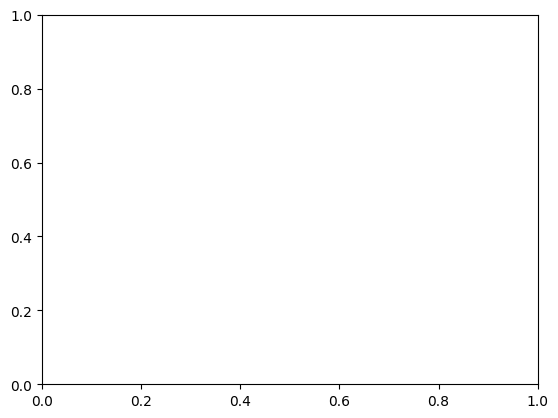

In [19]:
fig, ax = plt.subplots()

In [21]:
print(df)

          決算年月      2019年3月      2020年3月      2021年3月      2022年3月  \
0    売上高 （百万円）  2, 163, 625  2, 266, 808  2, 318, 658  2, 551, 906   
1   売上高 ( 百万円)  1, 200, 560  1, 308, 519  1, 758, 910  1, 695, 344   
2  売上収益 ( 百万円)     954, 714  1, 052, 943  1, 205, 846  1, 567, 421   
3   売上高 ( 百万円)  5, 080, 353  5, 237, 221  5, 312, 599  5, 446, 708   
4   売上高 ( 百万円)  4, 656, 815  4, 861, 247  5, 205, 537  5, 690, 606   
5   売上高 ( 百万円)     331, 648     366, 594     277, 748          NaN   

       2023年3月   2017年3月   2018年3月  
0  3, 490, 182       NaN       NaN  
1  1, 601, 677       NaN       NaN  
2  1, 672, 377       NaN       NaN  
3  5, 671, 762       NaN       NaN  
4  5, 911, 999       NaN       NaN  
5          NaN  366, 939  323, 664  


In [36]:
xa = df.to_numpy()

In [37]:
xa

array([['売上高 （百万円）', '2, 163, 625', '2, 266, 808', '2, 318, 658',
        '2, 551, 906', '3, 490, 182', nan, nan],
       ['売上高 ( 百万円)', '1, 200, 560', '1, 308, 519', '1, 758, 910',
        '1, 695, 344', '1, 601, 677', nan, nan],
       ['売上収益 ( 百万円)', '954, 714', '1, 052, 943', '1, 205, 846',
        '1, 567, 421', '1, 672, 377', nan, nan],
       ['売上高 ( 百万円)', '5, 080, 353', '5, 237, 221', '5, 312, 599',
        '5, 446, 708', '5, 671, 762', nan, nan],
       ['売上高 ( 百万円)', '4, 656, 815', '4, 861, 247', '5, 205, 537',
        '5, 690, 606', '5, 911, 999', nan, nan],
       ['売上高 ( 百万円)', '331, 648', '366, 594', '277, 748', nan, nan,
        '366, 939', '323, 664']], dtype=object)